In [1]:
!pip install -q ultralytics



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.7 MB/s eta 0:00:00


#Upload dataset (zip folder)

In [ ]:
from google.colab import files
uploaded = files.upload()

# Load the dataset                            
Change the path of the dataset

In [ ]:
!unzip -q /content/dataset.zip -d /content/dataset


#Check the files (If missing)

In [ ]:
import os

print("Files and folders inside /content/dataset:")
print(os.listdir('/content/dataset'))


Files and folders inside /content/dataset:
['README.roboflow.txt', 'weed_dataset.yaml', 'test', 'train', 'valid', 'README.dataset.txt']


In [ ]:
import os

dataset_path = '/content/dataset'

for split in ['train', 'valid', 'test']:
    print(f"\nContents of {split} folder:")
    folder_path = os.path.join(dataset_path, split)
    if os.path.exists(folder_path):
        print(os.listdir(folder_path))
    else:
        print(f"Folder {split} does not exist!")



Contents of train folder:
['IMG_0212_JPG.rf.db228bd7240512a675fe00e559fcf044.jpg', '2c729b95b34843c68f3de7d4023800da__sicklepod__5_jpg.rf.69976e7b3c13fda44f7db5d66e210fdb.jpg', '2c729b95b34843c68f3de7d4023800da__sicklepod__6_jpg.rf.00fe944c94dc006fa78c0da2acc47623.jpg', '38c73a991b6443fcbfce9e137dec7d02__crabgrass__3_jpg.rf.7ea13a7598fdae3326f8cefb67d8b9e1.jpg', 'IMG_0254_JPG.rf.a5cab1856cdd4b12b0452dc268760dd6.jpg', 'IMG_1315--3-_JPG.rf.7277340dd10f9ba57cb85ff9b970909d.jpg', '2c2b288edde44b2d9ee1424090e844f2__prickly_sida__1_jpg.rf.a17660583b14acd585d95ca1eaba6e0b.jpg', '6ef2fac82c534a7aa3af0449923a4a34__purselane__0_jpg.rf.44717f88f67ff8baac60ebb7e0dbe37d.jpg', 'IMG_0248_JPG.rf.6bf87150e3ecd6c8df48a32398bd915e.jpg', 'IMG_0243_JPG.rf.851f922f8f9d59e51e23a56a54fa3b1e.jpg', '359b49f80bef46e68ed2ac6f17b65849__sicklepod__0_jpg.rf.18e0244f010202145572bbda5b204cad.jpg', 'DSC_0347_JPG.rf.acea4af28c946a569d39f05ce996c5b1.jpg', '5394a1240c224e288698fa1c1b86a314__crabgrass__0_jpg.rf.75ea19fd3f

In [ ]:
import json
import os

dataset_path = '/content/dataset'

def load_annotations(split):
    annotation_path = os.path.join(dataset_path, split, '_annotations.createml.json')
    if not os.path.isfile(annotation_path):
        print(f"Annotation file missing in {split} folder!")
        return None

    with open(annotation_path, 'r') as f:
        annotations = json.load(f)
    return annotations

for split in ['train', 'valid', 'test']:
    annotations = load_annotations(split)
    if annotations is None:
        continue
    print(f"\nSample annotations from {split} (up to 3 entries):")

    for i, entry in enumerate(annotations):
        image_name = entry.get('image')
        label_data = entry.get('annotations')
        print(f"{image_name}: {label_data}")
        if i >= 2:
            break


Sample annotations from train (up to 3 entries):
IMG_0238_JPG.rf.e30574f3e8c4f2be9b2374ad41da8334.jpg: [{'label': 'Weed', 'coordinates': {'x': 156.8253965, 'y': 243.69003700000002, 'width': 77.03703700000001, 'height': 57.56457600000002}}]
IMG_0327_JPG.rf.fea189cfbc26c2d6018998130176b044.jpg: [{'label': 'Purslane', 'coordinates': {'x': 226.02259750000002, 'y': 206.2552545, 'width': 368.758335, 'height': 353.85343900000004}}]
IMG_1352_JPG.rf.1be6a7e8cd3adc02f6e321aeeb646fb0.jpg: [{'label': 'Purslane', 'coordinates': {'x': 231.36215700000002, 'y': 173.9894075, 'width': 258.13649, 'height': 211.17227499999996}}]

Sample annotations from valid (up to 3 entries):
1f21911fa3b14016ae9c4f617b01ea2a__palmer_amaranth__45_jpg.rf.5abd9bacdf275d2257d1b8465e767e49.jpg: [{'label': 'Weed', 'coordinates': {'x': 209.70075, 'y': 203.257347, 'width': 412.5985, 'height': 406.514694}}]
1f21911fa3b14016ae9c4f617b01ea2a__palmer_amaranth__12_jpg.rf.fd515d8ffbd571d92ee1b31760bf3507.jpg: [{'label': 'Weed', 'coo

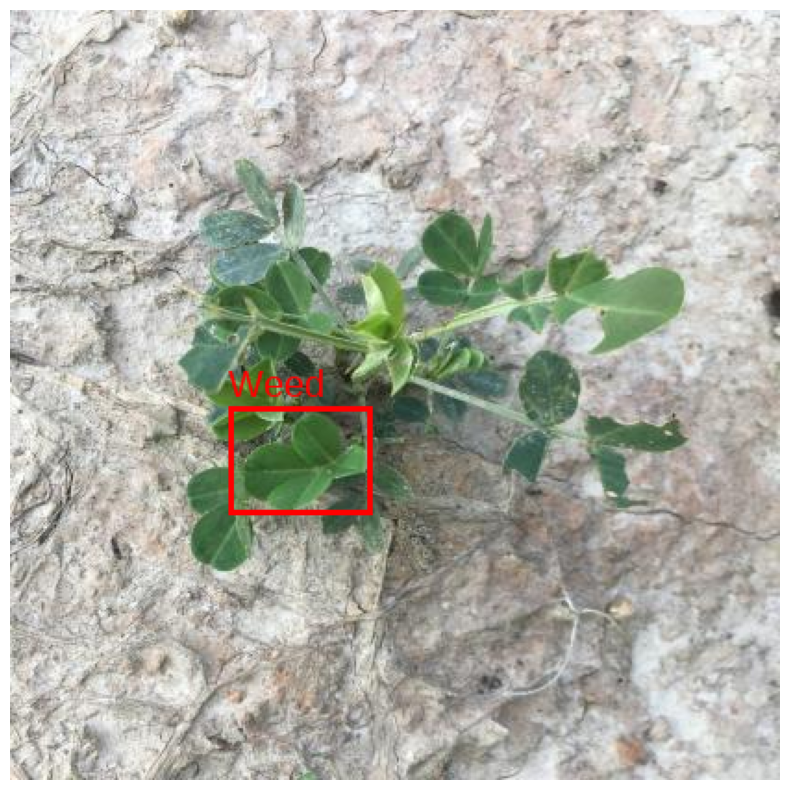

In [ ]:
import json
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

dataset_path = '/content/dataset'

def load_annotations(split):
    annotation_path = os.path.join(dataset_path, split, '_annotations.createml.json')
    with open(annotation_path, 'r') as f:
        return json.load(f)

def visualize_image_with_boxes(split, entry):
    image_name = entry['image']
    annotations = entry['annotations']
    image_path = os.path.join(dataset_path, split, image_name)
    image = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)

    for obj in annotations:
        label = obj['label']
        coords = obj['coordinates']
        # Bounding box corners
        x0 = coords['x'] - coords['width'] / 2
        y0 = coords['y'] - coords['height'] / 2
        x1 = coords['x'] + coords['width'] / 2
        y1 = coords['y'] + coords['height'] / 2


        # Draw rectangle
        draw.rectangle([x0, y0, x1, y1], outline="red", width=3)
        # Draw label text
        try:
            # Attempt to use a font if available
            font_size = 20
            font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf", font_size)
            draw.text((x0, y0 - font_size - 5), label, fill="red", font=font)
        except IOError:
            # Fallback to default font if LiberationSans is not found
            draw.text((x0, y0 - 10), label, fill="red")


    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()


split = 'train'
annotations_list = load_annotations(split)

if annotations_list:
    first_entry = annotations_list[0]
    visualize_image_with_boxes(split, first_entry)
else:
    print(f"No annotations found for split: {split}")

In [ ]:
import json
import os

dataset_path = '/content/dataset'
splits = ['train', 'valid', 'test']

unique_labels = set()

for split in splits:
    annotation_path = os.path.join(dataset_path, split, '_annotations.createml.json')
    with open(annotation_path, 'r') as f:
        annotations = json.load(f)
    for entry in annotations:
        for obj in entry['annotations']:
            unique_labels.add(obj['label'])

print("Unique labels found across dataset:")
for label in sorted(unique_labels):
    print(f" - {label}")


Unique labels found across dataset:
 - Crabgrass
 - Goosegrass
 - Palmer Amarath
 - PalmerAmarath
 - Prickly Sida
 - Purslane
 - Weed
 - weed


In [ ]:
import os
import json
from PIL import Image

dataset_path = '/content/dataset'
splits = ['train', 'valid', 'test']


raw_to_unified = {
    'Crabgrass': 'crabgrass',
    'Goosegrass': 'goosegrass',
    'Palmer Amarath': 'palmeramarath',
    'PalmerAmarath': 'palmeramarath',
    'Prickly Sida': 'pricklysida',
    'Purslane': 'purslane',
    'Weed': 'weed',
    'weed': 'weed',
    # Add any other labels here if found in your dataset
}


label_map = {
    'crabgrass': 0,
    'goosegrass': 1,
    'palmeramarath': 2,
    'pricklysida': 3,
    'purslane': 4,
    'weed': 5
}

def normalize_label(raw_label):
    return raw_to_unified.get(raw_label.strip(), None)

def convert_to_yolo_format(split):
    annotation_path = os.path.join(dataset_path, split, '_annotations.createml.json')
    images_folder = os.path.join(dataset_path, split)
    yolo_labels_folder = os.path.join(dataset_path, split, 'labels')
    os.makedirs(yolo_labels_folder, exist_ok=True)

    with open(annotation_path, 'r') as f:
        annotations_list = json.load(f)

    for entry in annotations_list:
        image_name = entry['image']
        image_path = os.path.join(images_folder, image_name)

        if not os.path.isfile(image_path):
            print(f"Warning: Image file not found: {image_path}")
            continue

        image = Image.open(image_path)
        w, h = image.size

        yolo_label_lines = []
        for obj in entry['annotations']:
            raw_label = obj['label']
            norm_label = normalize_label(raw_label)
            if norm_label is None:
                print(f"Warning: Unknown label '{raw_label}' found in image '{image_name}'. Skipping.")
                continue
            class_id = label_map[norm_label]

            coords = obj['coordinates']
            cx = coords['x']
            cy = coords['y']
            bw = coords['width']
            bh = coords['height']


            cx_norm = cx / w
            cy_norm = cy / h
            bw_norm = bw / w
            bh_norm = bh / h

            yolo_label_lines.append(f"{class_id} {cx_norm:.6f} {cy_norm:.6f} {bw_norm:.6f} {bh_norm:.6f}")

        label_file_path = os.path.join(yolo_labels_folder, os.path.splitext(image_name)[0] + '.txt')
        with open(label_file_path, 'w') as f:
            f.write('\n'.join(yolo_label_lines))

        if not yolo_label_lines:

            open(label_file_path, 'w').close()

    print(f"Finished converting {split} split to YOLO format.")

for split in splits:
    convert_to_yolo_format(split)


Finished converting train split to YOLO format.
Finished converting valid split to YOLO format.
Finished converting test split to YOLO format.


##Data Formatting

In [ ]:
!mkdir -p /content/dataset/train/images
!mkdir -p /content/dataset/train/labels

!mv /content/dataset/train/*.jpg /content/dataset/train/images/
!mv /content/dataset/train/*.txt /content/dataset/train/labels/



mv: cannot stat '/content/dataset/train/*.txt': No such file or directory


In [ ]:
!mkdir -p /content/dataset/valid/images
!mkdir -p /content/dataset/valid/labels

!mv /content/dataset/valid/*.jpg /content/dataset/valid/images/
!mv /content/dataset/valid/*.txt /content/dataset/valid/labels/


mv: cannot stat '/content/dataset/valid/*.txt': No such file or directory


In [ ]:

!mkdir -p /content/dataset/test/images
!mkdir -p /content/dataset/test/labels

!mv /content/dataset/test/*.jpg /content/dataset/test/images/
!mv /content/dataset/test/*.txt /content/dataset/test/labels/

mv: cannot stat '/content/dataset/test/*.txt': No such file or directory


#Handling Error and missing labels

In [ ]:
import os

images_dir = "/content/dataset/train/images"
labels_dir = "/content/dataset/train/labels"

image_files = set(os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png')))
label_files = set(os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt'))

missing_labels = image_files - label_files
missing_images = label_files - image_files

print(f"Images without labels ({len(missing_labels)}): {missing_labels}")
print(f"Labels without images ({len(missing_images)}): {missing_images}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset/test/images'

In [ ]:
import os

images_without_labels = [
    '235e3c551fe9421c9e88f1d82f41f75a__crabgrass__2_jpg.rf.7f855ced3834c86a4a79a57032626ab6',
    '4cf2e05232e843738a6542440e29897e__purselane__0_jpg.rf.b661b6e5b2b390db58e32e3881e0f76e'
]

labels_dir = "/content/dataset/train/labels"

for img_name in images_without_labels:
    label_path = os.path.join(labels_dir, img_name + '.txt')
    with open(label_path, 'w') as f:
        pass  # creates an empty file
print("Empty label files created for images without labels.")


Empty label files created for images without labels.


In [ ]:
import os

valid_images = set(os.path.splitext(f)[0] for f in os.listdir('/content/dataset/valid/images') if f.endswith(('.jpg', '.png')))
valid_labels = set(os.path.splitext(f)[0] for f in os.listdir('/content/dataset/valid/labels') if f.endswith('.txt'))

missing_labels_val = valid_images - valid_labels
missing_images_val = valid_labels - valid_images

print(f"Validation images without labels ({len(missing_labels_val)}): {missing_labels_val}")
print(f"Validation labels without images ({len(missing_images_val)}): {missing_images_val}")


Validation images without labels (0): set()
Validation labels without images (0): set()


#Install dependencies before training (yolo11 model)

##Training model using YOLO11.

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11m.pt")  # choose n/s/m/l/x
results = model.train(
    data="/content/drive/MyDrive/cotton-weed-detection/data/dataset/weed_dataset.yaml",
    epochs=100,         # adjust as needed
    imgsz=640,          # keep consistent with prior runs if desired
    batch=16,         # or a number that fits your GPU
)


#Detection and Output

In [5]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/cotton-weed-detection/models/yolo11m/best.pt")

results = model.predict(
    source="/content/drive/MyDrive/cotton-weed-detection/data/dataset/test/images",
    conf=0.25,
    imgsz=640,
    save=True,
    project="/content/drive/MyDrive/cotton-weed-detection/output/results(yolo11)",  # main folder
    name="detection_exp_all_images(yolo11)",  # subfolder name
    exist_ok=True  # overwrite if folder exists
)


for r in results:
    r.show()
    r.save()      # Save results to 'runs/predict' directory


Output hidden; open in https://colab.research.google.com to view.

#Confusion matrix and other graphs

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

folder_path = '/content/drive/MyDrive/cotton-weed-detection/runs/val'

# Get all image files (jpg/png)
images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png'))]

print(f"Found {len(images)} images.")

for img_name in images:
    img_path = os.path.join(folder_path, img_name)
    img = Image.open(img_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_name)
    plt.show()
